x1,y1 =  393 , 199
x2,y2 =  508 , 282


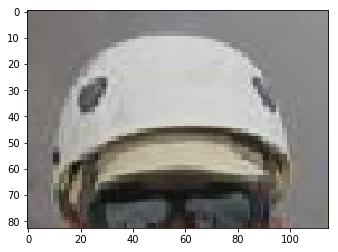

In [18]:
# -*- coding:utf-8 -*-
from __future__ import absolute_import
from __future__ import unicode_literals

import json
import pandas as pd




##########################################
# タグ付けしたファイルのタグ情報が正しいかチェックするスクリプト
##########################################


#タグ情報読み込み
with open('../data/helmet_rn.json') as f:
    result = json.load(f)
    #print("result = ",result)



#タグ情報の任意のインデックス番号を入力して、タグ情報と画像を付け合わせてタグづけされている部分を確認する

import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

def checkPosition(select):
    #filepath取得
    filepaths = sorted(glob('../data/helmet_rn/*.jpg'))

    #ファイルパスの数
    len(filepaths)
    #print(len(filepaths))

    #任意の番号をからファイルパス取得
    filepath = filepaths[select]
    #print("filepath = ",filepath)

    fileNo = filepath.replace('../data/helmet_rn/','')
    fileNo = fileNo.replace('.jpg','')
    fileNo = fileNo.replace('.JPG','')

    #表示してみる
    img = Image.open(filepath)
    #print("img = ",img)
    #img.show()


    #画像をarrayに変換
    img_list = np.asarray(img)
    #貼り付け
    plt.imshow(img_list)
    #表示
    #plt.show()

    
    #タグ情報取得
    vals = result['frames'][fileNo]
    #len(vals)
    val = vals[0]
    #print("val = ",val)

    x1 = val['x1']
    x2 = val['x2']

    y1 = val['y1']
    y2 = val['y2']


    #計測時の画面サイズにリサイズする
    img = Image.open(filepath).resize((val['width'], val['height']))

    #情報
    print("x1,y1 = ",x1,",",y1)
    print("x2,y2 = ",x2,",",y2)

    #指定座標のデータから画像を貼り付け
    img = np.array(img)
    img_part = img[y1:y2,x1:x2]
    #plt.imshow(img_part)

    #タグの場所を確認する
    #img = Image.open(filepath)
    plt.imshow(img_part)


    
#タグ情報配列のインデックスをintで渡す
#エラーハンドリングしていないので、エラーが出る場合は、タグ情報がない＝タグづけされていない

checkPosition(120)
